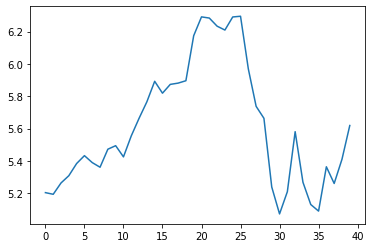

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eurodol = pd.read_excel("eurusd.xlsx").iloc[:,1]

# Paramètre
j = -4

t = np.linspace(0, np.size(eurodol)-1, np.size(eurodol))
k =  np.linspace(-1, np.size(eurodol)-2, np.size(eurodol))

# Détermination de nb_k
nb_k = int(np.ceil(np.size(eurodol)/2**(-j)) + 2)

# Initialisations
k1 = np.array(np.zeros(nb_k+1))
k2 = np.array(np.zeros(nb_k+1))
coeff = np.array(np.zeros(nb_k+1))

# Scale coefficient
for i in range(0, nb_k+1):
    k1[i] = k[i] * 2**(-j)
    k2[i] = (k[i] + 1) * 2**(-j)
    
    sum1 = 0
    sum2 = 0

    for p in range(0, np.size(eurodol)):
        if(t[p] >= k1[i]):
            sum1 += eurodol[p]
        if(t[p] >= k2[i]):
            sum2 += eurodol[p]

    coeff[i] = 2**(j/2) * (sum1 - sum2)

# Initialisations
t1 = np.array(np.zeros(np.size(eurodol)-1))
t2 = np.array(np.zeros(np.size(eurodol)-1))
approx = np.array(np.zeros(np.size(eurodol)))

# Approximation
for i in range(1, np.size(eurodol)):
    t1[i-1] = 2**j * t[i-1] - 1
    t2[i-1] = 2**j * t[i-1]
    
    sum1 = 0
    sum2 = 0
    for p in range(0, nb_k):
        if(k[p] >= t1[i-1]):
            sum1 += coeff[p]
        if(k[p] >= t2[i-1]):
            sum2 += coeff[p]
        
    approx[i] = 2**(j/2) * (sum1 - sum2)

coeff = coeff[1:np.size(coeff)-3]    
approx = approx[2:np.size(eurodol)-2**(-j)]

# Affichage
#plt.plot(eurodol)
#plt.plot(approx)
plt.plot(coeff)
plt.show()